EasyVisa Project<a href="#EasyVisa-Project" class="anchor-link">¶</a>
=====================================================================

Context:<a href="#Context:" class="anchor-link">¶</a>
-----------------------------------------------------

Business communities in the United States are facing high demand for
human resources, but one of the constant challenges is identifying and
attracting the right talent, which is perhaps the most important element
in remaining competitive. Companies in the United States look for
hard-working, talented, and qualified individuals both locally as well
as abroad.

The Immigration and Nationality Act (INA) of the US permits foreign
workers to come to the United States to work on either a temporary or
permanent basis. The act also protects US workers against adverse
impacts on their wages or working conditions by ensuring US employers'
compliance with statutory requirements when they hire foreign workers to
fill workforce shortages. The immigration programs are administered by
the Office of Foreign Labor Certification (OFLC).

OFLC processes job certification applications for employers seeking to
bring foreign workers into the United States and grants certifications
in those cases where employers can demonstrate that there are not
sufficient US workers available to perform the work at wages that meet
or exceed the wage paid for the occupation in the area of intended
employment.

Objective:<a href="#Objective:" class="anchor-link">¶</a>
---------------------------------------------------------

In FY 2016, the OFLC processed 775,979 employer applications for
1,699,957 positions for temporary and permanent labor certifications.
This was a nine percent increase in the overall number of processed
applications from the previous year. The process of reviewing every case
is becoming a tedious task as the number of applicants is increasing
every year.

The increasing number of applicants every year calls for a Machine
Learning based solution that can help in shortlisting the candidates
having higher chances of VISA approval. OFLC has hired your firm
EasyVisa for data-driven solutions. You as a data scientist have to
analyze the data provided and, with the help of a classification model:

-   Facilitate the process of visa approvals.
-   Recommend a suitable profile for the applicants for whom the visa
    should be certified or denied based on the drivers that
    significantly influence the case status.

Data Description<a href="#Data-Description" class="anchor-link">¶</a>
---------------------------------------------------------------------

The data contains the different attributes of the employee and the
employer. The detailed data dictionary is given below.

-   case\_id: ID of each visa application
-   continent: Information of continent the employee
-   education\_of\_employee: Information of education of the employee
-   has\_job\_experience: Does the employee has any job experience? Y=
    Yes; N = No
-   requires\_job\_training: Does the employee require any job training?
    Y = Yes; N = No
-   no\_of\_employees: Number of employees in the employer's company
-   yr\_of\_estab: Year in which the employer's company was established
-   region\_of\_employment: Information of foreign worker's intended
    region of employment in the US.
-   prevailing\_wage: Average wage paid to similarly employed workers in
    a specific occupation in the area of intended employment. The
    purpose of the prevailing wage is to ensure that the foreign worker
    is not underpaid compared to other workers offering the same or
    similar service in the same area of employment.
-   unit\_of\_wage: Unit of prevailing wage. Values include Hourly,
    Weekly, Monthly, and Yearly.
-   full\_time\_position: Is the position of work full-time? Y = Full
    Time Position; N = Part Time Position
-   case\_status: Flag indicating if the Visa was certified or denied

Importing necessary libraries and data<a href="#Importing-necessary-libraries-and-data" class="anchor-link">¶</a>
-----------------------------------------------------------------------------------------------------------------

In \[1\]:

    # Library to suppress warnings or deprecation notes 
    import warnings
    warnings.filterwarnings('ignore')

    # Libraries to help with reading and manipulating data
    import numpy as np
    import pandas as pd

    # Libraries to help with data visualization
    import matplotlib.pyplot as plt
    %matplotlib inline
    import seaborn as sns

    # Libraries to split data, impute missing values 
    from sklearn.model_selection import train_test_split
    from sklearn.impute import SimpleImputer

    # Libraries to import decision tree classifier and different ensemble classifiers
    from sklearn.ensemble import BaggingClassifier
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
    from xgboost import XGBClassifier
    from sklearn.ensemble import StackingClassifier
    from sklearn.tree import DecisionTreeClassifier

    # Libtune to tune model, get different metric scores
    from sklearn import metrics
    from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
    from sklearn.model_selection import GridSearchCV

### Read the data set:<a href="#Read-the-data-set:" class="anchor-link">¶</a>

In \[2\]:

    visa = pd.read_csv("EasyVisa.csv")

In \[3\]:

    # copy data to another variable to avoid any changes to original data
    data = visa.copy()

Data Overview<a href="#Data-Overview" class="anchor-link">¶</a>
---------------------------------------------------------------

-   Observations
-   Sanity checks

In \[4\]:

    #To view a random selection of rows from the data set:

    np.random.seed(1) # To get the same random selection everytime
    # Display the random sample
    data.sample(n=10)

Out\[4\]:

|       | case\_id  | continent     | education\_of\_employee | has\_job\_experience | requires\_job\_training | no\_of\_employees | yr\_of\_estab | region\_of\_employment | prevailing\_wage | unit\_of\_wage | full\_time\_position | case\_status |
|-------|-----------|---------------|-------------------------|----------------------|-------------------------|-------------------|---------------|------------------------|------------------|----------------|----------------------|--------------|
| 17639 | EZYV17640 | Asia          | Bachelor's              | Y                    | N                       | 567               | 1992          | Midwest                | 26842.9100       | Year           | Y                    | Certified    |
| 23951 | EZYV23952 | Oceania       | Bachelor's              | N                    | N                       | 619               | 1938          | Midwest                | 66419.9800       | Year           | Y                    | Certified    |
| 8625  | EZYV8626  | Asia          | Master's                | N                    | N                       | 2635              | 2005          | South                  | 887.2921         | Hour           | Y                    | Certified    |
| 20206 | EZYV20207 | Asia          | Bachelor's              | Y                    | Y                       | 3184              | 1986          | Northeast              | 49435.8000       | Year           | Y                    | Certified    |
| 7471  | EZYV7472  | Europe        | Bachelor's              | Y                    | N                       | 4681              | 1928          | West                   | 49865.1900       | Year           | Y                    | Denied       |
| 3433  | EZYV3434  | Asia          | Bachelor's              | Y                    | N                       | 222               | 1989          | South                  | 813.7261         | Hour           | Y                    | Certified    |
| 24440 | EZYV24441 | Europe        | High School             | N                    | Y                       | 3278              | 1994          | South                  | 204948.3900      | Year           | Y                    | Denied       |
| 12104 | EZYV12105 | Asia          | Master's                | Y                    | N                       | 1359              | 1997          | West                   | 202237.0400      | Year           | N                    | Certified    |
| 15656 | EZYV15657 | Asia          | Bachelor's              | N                    | N                       | 2081              | 2003          | West                   | 111713.0200      | Year           | Y                    | Denied       |
| 23110 | EZYV23111 | North America | Bachelor's              | Y                    | N                       | 854               | 1998          | Northeast              | 444.8257         | Hour           | Y                    | Denied       |

The sample selection gives an interesting picture of the data set:

-   with some employees without job experience not requiring training,
    getting full-time positions and receiving a good realy pay yearly.
-   it seems a high number of visas have been granted and
-   some of the businesses are over 80 years old while some are much
    newer at around 16 years of existing.

In \[5\]:

    # To capture the dimensions of the data set:
    print(f"There are {data.shape[0]} rows and {data.shape[1]} columns.")

    There are 25480 rows and 12 columns.

In \[6\]:

    #Let's look at the data types and check for null values:
    data.info()

    <class 'pandas.core.frame.DataFrame'>
    RangeIndex: 25480 entries, 0 to 25479
    Data columns (total 12 columns):
     #   Column                 Non-Null Count  Dtype  
    ---  ------                 --------------  -----  
     0   case_id                25480 non-null  object 
     1   continent              25480 non-null  object 
     2   education_of_employee  25480 non-null  object 
     3   has_job_experience     25480 non-null  object 
     4   requires_job_training  25480 non-null  object 
     5   no_of_employees        25480 non-null  int64  
     6   yr_of_estab            25480 non-null  int64  
     7   region_of_employment   25480 non-null  object 
     8   prevailing_wage        25480 non-null  float64
     9   unit_of_wage           25480 non-null  object 
     10  full_time_position     25480 non-null  object 
     11  case_status            25480 non-null  object 
    dtypes: float64(1), int64(2), object(9)
    memory usage: 2.3+ MB

-   It would appear that there are no null values in the data set.
-   There are 9 object, 2 int and 1 float data types contained in the
    data set.
-   There may be a need for conversion of 'object' to 'category' later.

**We can go ahead to confirm missing values:**

In \[7\]:

    data.isna().sum()

Out\[7\]:

    case_id                  0
    continent                0
    education_of_employee    0
    has_job_experience       0
    requires_job_training    0
    no_of_employees          0
    yr_of_estab              0
    region_of_employment     0
    prevailing_wage          0
    unit_of_wage             0
    full_time_position       0
    case_status              0
    dtype: int64

We have confirmed that there are no missing values in the data set. We
can continue exploring.

#### Summary of the data set:<a href="#Summary-of-the-data-set:" class="anchor-link">¶</a>

In \[8\]:

    data.describe(include = 'all').T

Out\[8\]:

|                         | count | unique | top        | freq  | mean    | std     | min    | 25%     | 50%     | 75%    | max    |
|-------------------------|-------|--------|------------|-------|---------|---------|--------|---------|---------|--------|--------|
| case\_id                | 25480 | 25480  | EZYV719    | 1     | NaN     | NaN     | NaN    | NaN     | NaN     | NaN    | NaN    |
| continent               | 25480 | 6      | Asia       | 16861 | NaN     | NaN     | NaN    | NaN     | NaN     | NaN    | NaN    |
| education\_of\_employee | 25480 | 4      | Bachelor's | 10234 | NaN     | NaN     | NaN    | NaN     | NaN     | NaN    | NaN    |
| has\_job\_experience    | 25480 | 2      | Y          | 14802 | NaN     | NaN     | NaN    | NaN     | NaN     | NaN    | NaN    |
| requires\_job\_training | 25480 | 2      | N          | 22525 | NaN     | NaN     | NaN    | NaN     | NaN     | NaN    | NaN    |
| no\_of\_employees       | 25480 | NaN    | NaN        | NaN   | 5667.04 | 22877.9 | -26    | 1022    | 2109    | 3504   | 602069 |
| yr\_of\_estab           | 25480 | NaN    | NaN        | NaN   | 1979.41 | 42.3669 | 1800   | 1976    | 1997    | 2005   | 2016   |
| region\_of\_employment  | 25480 | 5      | Northeast  | 7195  | NaN     | NaN     | NaN    | NaN     | NaN     | NaN    | NaN    |
| prevailing\_wage        | 25480 | NaN    | NaN        | NaN   | 74455.8 | 52815.9 | 2.1367 | 34015.5 | 70308.2 | 107736 | 319210 |
| unit\_of\_wage          | 25480 | 4      | Year       | 22962 | NaN     | NaN     | NaN    | NaN     | NaN     | NaN    | NaN    |
| full\_time\_position    | 25480 | 2      | Y          | 22773 | NaN     | NaN     | NaN    | NaN     | NaN     | NaN    | NaN    |
| case\_status            | 25480 | 2      | Certified  | 17018 | NaN     | NaN     | NaN    | NaN     | NaN     | NaN    | NaN    |

**Observations:**

-   We will be dropping "case\_id" because it is an identifier and we
    have no use for it while building models.
-   Asia is the top recurring continent out of 6. Futher analysis will
    reveal the visa certification rates per continent.
-   Most employees hold a bachelor's degree.
-   More employees have job experience than not.
-   Fewer employees require training. This may or may not be related to
    having work experience and will be explored later.
-   A very odd observation of -26 employees indicates an anomaly.
    Obviously heavy outliers because there's a maximum value of over
    600,000 employees. This variable will be treated for outliers.
-   This summary reveals even younger companies than earlier observed
    from the sample display. The youngest company was established
    in 2016.
-   The Northeast employs more than the other regions.
-   Outliers exist in this variable.
-   Most of the employees i.e. 90% are placed on yearly wages.
-   A similar ratio on employees get full time positions.
-   As observed in the sample display, little over two thirds of the
    employees get their visas certified.

In \[9\]:

    #To see the variation in observations:
    data.nunique()

Out\[9\]:

    case_id                  25480
    continent                    6
    education_of_employee        4
    has_job_experience           2
    requires_job_training        2
    no_of_employees           7105
    yr_of_estab                199
    region_of_employment         5
    prevailing_wage          25454
    unit_of_wage                 4
    full_time_position           2
    case_status                  2
    dtype: int64

**Let's drop "case\_id":**

In \[10\]:

    data.drop(["case_id"], axis=1, inplace= True)

**Let's have a look at the observation counts per category:**

In \[11\]:

    cat_cols=["continent", "education_of_employee", "has_job_experience", "requires_job_training", "region_of_employment","unit_of_wage","full_time_position","case_status"]

    for column in cat_cols:
        print(data[column].value_counts())
        print('-'*50)

    Asia             16861
    Europe            3732
    North America     3292
    South America      852
    Africa             551
    Oceania            192
    Name: continent, dtype: int64
    --------------------------------------------------
    Bachelor's     10234
    Master's        9634
    High School     3420
    Doctorate       2192
    Name: education_of_employee, dtype: int64
    --------------------------------------------------
    Y    14802
    N    10678
    Name: has_job_experience, dtype: int64
    --------------------------------------------------
    N    22525
    Y     2955
    Name: requires_job_training, dtype: int64
    --------------------------------------------------
    Northeast    7195
    South        7017
    West         6586
    Midwest      4307
    Island        375
    Name: region_of_employment, dtype: int64
    --------------------------------------------------
    Year     22962
    Hour      2157
    Week       272
    Month       89
    Name: unit_of_wage, dtype: int64
    --------------------------------------------------
    Y    22773
    N     2707
    Name: full_time_position, dtype: int64
    --------------------------------------------------
    Certified    17018
    Denied        8462
    Name: case_status, dtype: int64
    --------------------------------------------------

**Observations:**

-   Not surprisingly, Oceania has the least number of employees.
-   The Northeast and South are the highest regions of employment.

Exploratory Data Analysis (EDA)<a href="#Exploratory-Data-Analysis-(EDA)" class="anchor-link">¶</a>
---------------------------------------------------------------------------------------------------

-   EDA is an important part of any project involving data.
-   It is important to investigate and understand the data better before
    building a model with it.
-   A few questions have been mentioned below which will help you
    approach the analysis in the right manner and generate insights from
    the data.
-   A thorough analysis of the data, in addition to the questions
    mentioned below, should be done.

### Univariate Analysis:<a href="#Univariate-Analysis:" class="anchor-link">¶</a>

In \[12\]:

    # Function to plot a boxplot and a histogram along the same scale.


    def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
        """
        Boxplot and histogram combined

        data: dataframe
        feature: dataframe column
        figsize: size of figure (default (12,7))
        kde: whether to show the density curve (default False)
        bins: number of bins for histogram (default None)
        """
        f2, (ax_box2, ax_hist2) = plt.subplots(
            nrows=2,  # Number of rows of the subplot grid= 2
            sharex=True,  # x-axis will be shared among all subplots
            gridspec_kw={"height_ratios": (0.25, 0.75)},
            figsize=figsize,
        )  # creating the 2 subplots
        sns.boxplot(
            data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
        )  # boxplot will be created and a star will indicate the mean value of the column
        sns.histplot(
            data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
        ) if bins else sns.histplot(
            data=data, x=feature, kde=kde, ax=ax_hist2
        )  # For histogram
        ax_hist2.axvline(
            data[feature].mean(), color="green", linestyle="--"
        )  # Add mean to the histogram
        ax_hist2.axvline(
            data[feature].median(), color="black", linestyle="-"
        )  # Add median to the histogram

**Observations on Number of Employees:**

In \[13\]:

    histogram_boxplot(data, "no_of_employees")

![](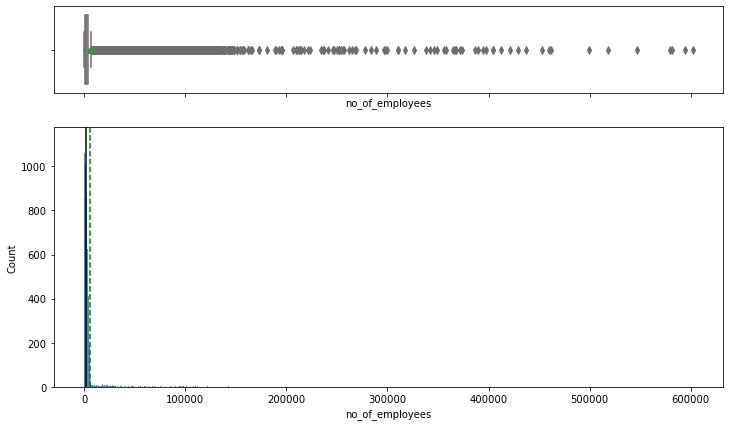%0A)

In \[14\]:

    #Top 5 highest values 
    data['no_of_employees'].nlargest(10)

Out\[14\]:

    21339    602069
    1345     594472
    20345    581468
    11317    579004
    9587     547172
    2783     517884
    15268    499720
    8626     461527
    24071    459450
    23176    453142
    Name: no_of_employees, dtype: int64

-   This variable holds more outliers than actual values.
-   While we see a concentration of the companies having below 1000
    employees, there are many outliers observed with companies having
    100,000 to over 600,000 employees

In \[15\]:

    histogram_boxplot(data, "yr_of_estab")

![](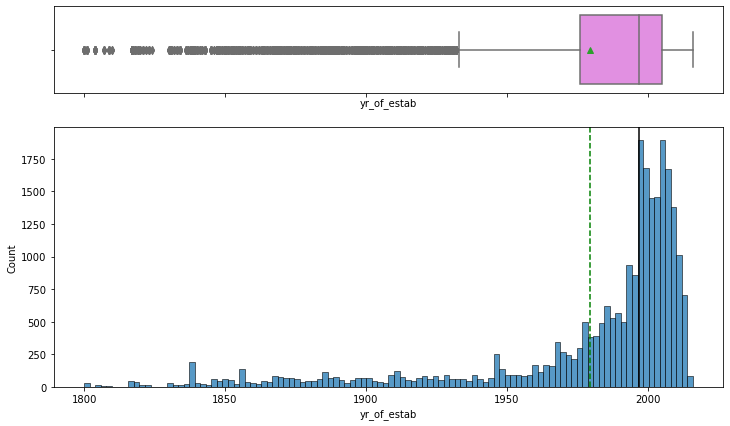%0A)

-   Heavily left skewed.
-   Many of the companies were established after the mid 90s.

In \[16\]:

    histogram_boxplot(data,"prevailing_wage")

![](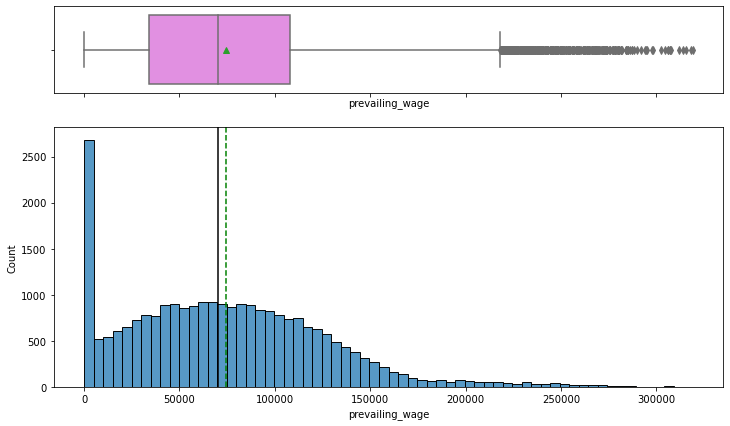%0A)

-   Skewed right with outliers on the higher end of the scale.
-   A very high number of employees fall within the 0-10,000 income
    bracket. This could be because they fall within the hourly/weekly
    wage groups.
-   Beyond the initial spike the distributions is almost normal with
    most employees earning between 10,000 and 100,000 and mean earnings
    at a little under 75,000

**Exploring categoricals:**

In \[17\]:

    # function to create labeled barplots


    def labeled_barplot(data, feature, perc=False, n=None):
        """
        Barplot with percentage at the top

        data: dataframe
        feature: dataframe column
        perc: whether to display percentages instead of count (default is False)
        n: displays the top n category levels (default is None, i.e., display all levels)
        """

        total = len(data[feature])  # length of the column
        count = data[feature].nunique()
        if n is None:
            plt.figure(figsize=(count + 1, 5))
        else:
            plt.figure(figsize=(n + 1, 5))

        plt.xticks(rotation=90, fontsize=15)
        ax = sns.countplot(
            data=data,
            x=feature,
            palette="Paired",
            order=data[feature].value_counts().index[:n].sort_values(),
        )

        for p in ax.patches:
            if perc == True:
                label = "{:.1f}%".format(
                    100 * p.get_height() / total
                )  # percentage of each class of the category
            else:
                label = p.get_height()  # count of each level of the category

            x = p.get_x() + p.get_width() / 2  # width of the plot
            y = p.get_height()  # height of the plot

            ax.annotate(
                label,
                (x, y),
                ha="center",
                va="center",
                size=12,
                xytext=(0, 5),
                textcoords="offset points",
            )  # annotate the percentage

        plt.show()  # show the plot

**Observations on Continents:**

In \[18\]:

    labeled_barplot(data, "continent",perc=True)

![](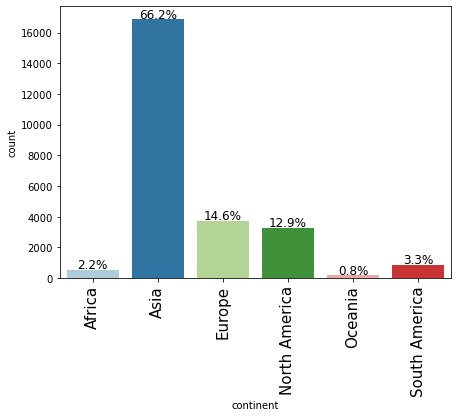%0A)

-   Over two thirds of the employees come from Asia followed distantly
    by Europe and North America

In \[19\]:

    labeled_barplot(data, "education_of_employee",perc=True)

![](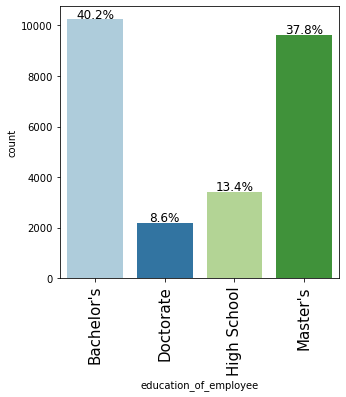%0A)

-   Most employees have at least a Bachelor's degree. A considerable
    ratio also hold Master's degrees.

In \[20\]:

    labeled_barplot(data, "has_job_experience",perc=True)

![](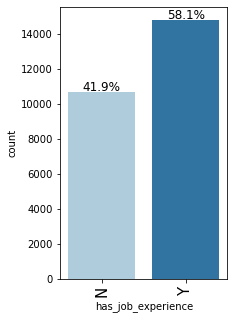%0A)

-   As we already observed, most of the employees have job experience.

In \[21\]:

    labeled_barplot(data, "requires_job_training",perc=True)

![](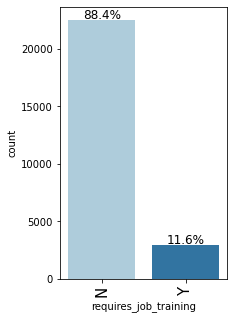%0A)

-   Far fewer employees require training than do.

In \[22\]:

    labeled_barplot(data, "region_of_employment",perc=True)

![](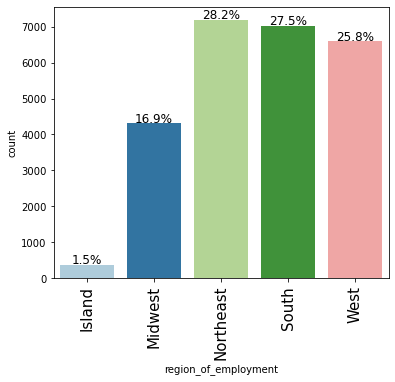%0A)

-   The Island region has the lowest employment rate of all the regions.

In \[23\]:

    labeled_barplot(data, "unit_of_wage",perc=True)

![](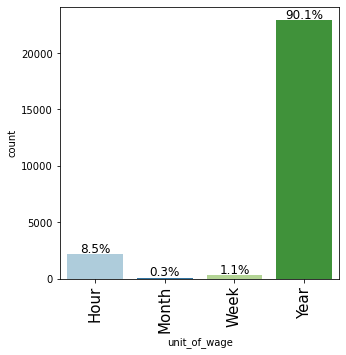%0A)

-   Very few employees are placed on monthly and weekly wages.

In \[24\]:

    labeled_barplot(data, "full_time_position",perc=True)

![](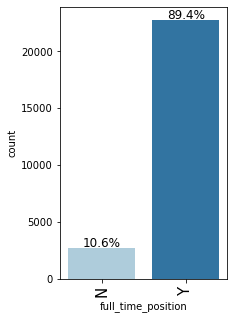%0A)

-   Most employees work full time.

In \[25\]:

    labeled_barplot(data, "case_status",perc=True)

![](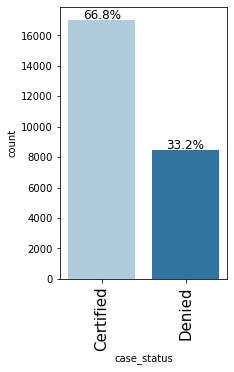%0A)

-   We already noted that more visas get certified.

### Bivariate Analysis:<a href="#Bivariate-Analysis:" class="anchor-link">¶</a>

#### Observations on Continent vs Case Status:<a href="#Observations-on-Continent-vs-Case-Status:" class="anchor-link">¶</a>

In \[26\]:

    plt.figure(figsize=(9,7))
    sns.countplot(data['continent'], hue = data['case_status'])
    plt.show()

![](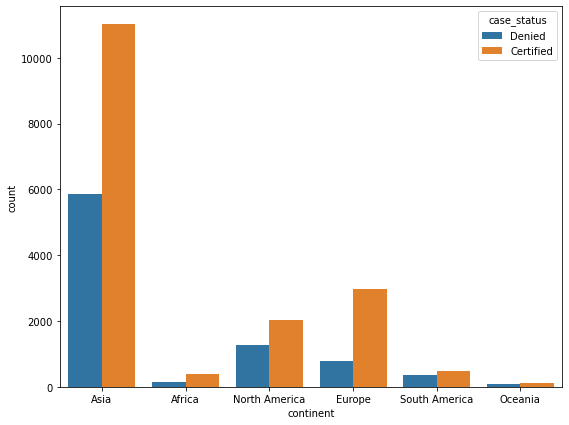%0A)

-   Asia has the highest number of visa certifications and also holds
    the highest number of denied visas. This isn't strange since the
    continent makes up the majority of employee applications.
-   Europe has the lowest number of denials in comparison to its
    certifications.

#### Observations on Education vs Case Status:<a href="#Observations-on-Education-vs-Case-Status:" class="anchor-link">¶</a>

In \[27\]:

    plt.figure(figsize=(9,7))
    sns.countplot(data['education_of_employee'], hue = data['case_status'])
    plt.show()

![](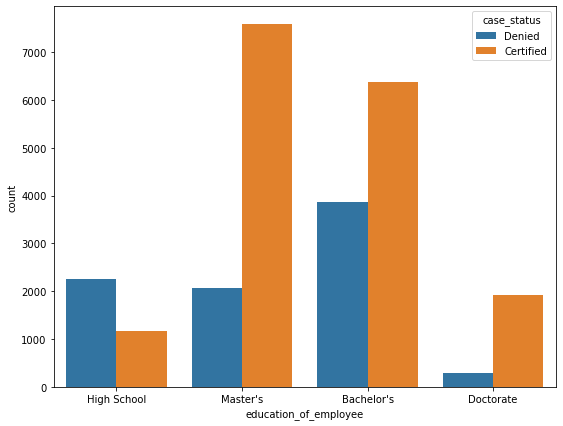%0A)

-   Master's degree holders have the highest certification rates,
    followed closely by Bachelor's degrees.
-   Doctorate holders have a lower certification rate but also have the
    least denials.
-   Bachelor's and High School education employees get denied visas more
    than the other categories.

#### Observations on Experience vs Case Status:<a href="#Observations-on-Experience-vs-Case-Status:" class="anchor-link">¶</a>

In \[28\]:

    plt.figure(figsize=(9,7))
    sns.countplot(data['has_job_experience'], hue = data['case_status'])
    plt.show()

![](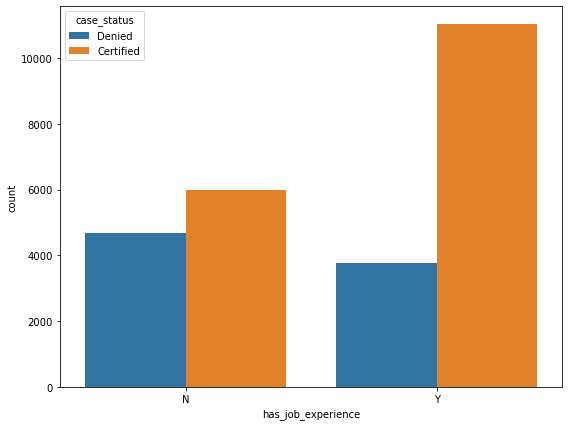%0A)

-   Employees with job experience have a considerably higher visa
    certification rate.

#### Observations on training requirement vs Case Status:<a href="#Observations-on-training-requirement-vs-Case-Status:" class="anchor-link">¶</a>

In \[29\]:

    plt.figure(figsize=(9,7))
    sns.countplot(data['requires_job_training'], hue = data['case_status'])
    plt.show()

![](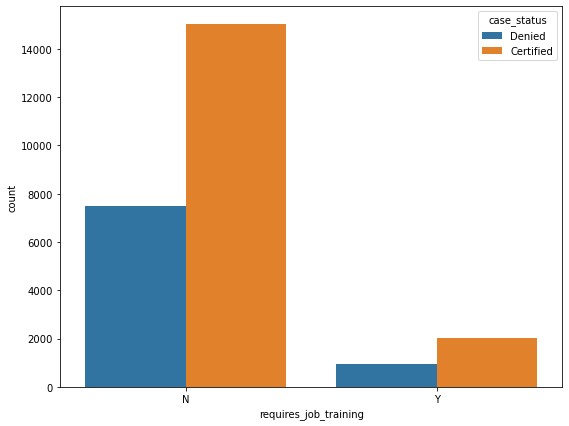%0A)

-   Not needing training greatly improves the chances of getting a visa
    certified.

#### Observations on Region of Employment vs Case Status:<a href="#Observations-on-Region-of-Employment-vs-Case-Status:" class="anchor-link">¶</a>

In \[30\]:

    plt.figure(figsize=(9,7))
    sns.countplot(data['region_of_employment'], hue = data['case_status'])
    plt.show()

![](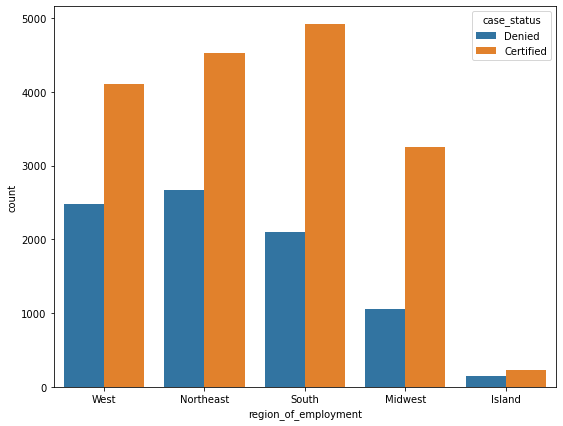%0A)

-   It is very interesting to find that though the Northeast is the
    highest employer, the South has a higher certification rate.

**Observations on Unit of Wage vs Case Status:**

In \[31\]:

    plt.figure(figsize=(9,7))
    sns.countplot(data['unit_of_wage'], hue = data['case_status'])
    plt.show()

![](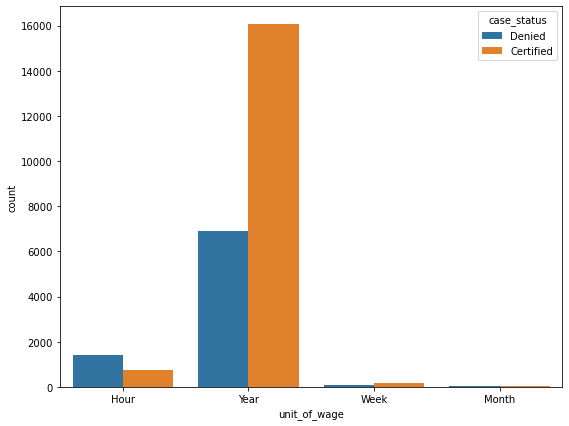%0A)

-   More visas are issued to employees on yearly wages.

In \[32\]:

    plt.figure(figsize=(9,7))
    sns.countplot(data['full_time_position'], hue = data['case_status'])
    plt.show()

![](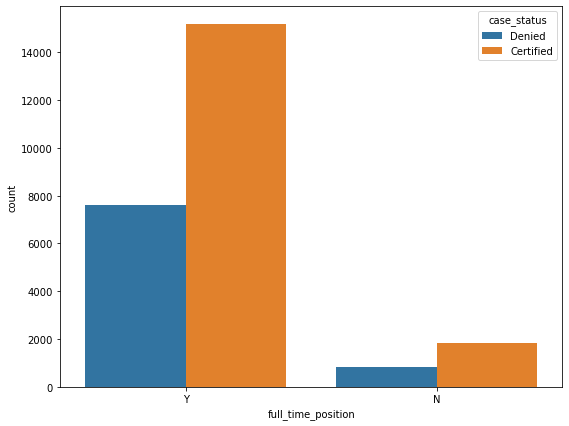%0A)

-   Full-time employement gets more visa certifications.

### Multivariate Analysis:<a href="#Multivariate-Analysis:" class="anchor-link">¶</a>

In \[33\]:

    # Checking case status against education and job experience:
    sns.catplot(x="has_job_experience",
                   hue="case_status", 
                   col="education_of_employee", 
                   data=data, 
                   kind="count");

![](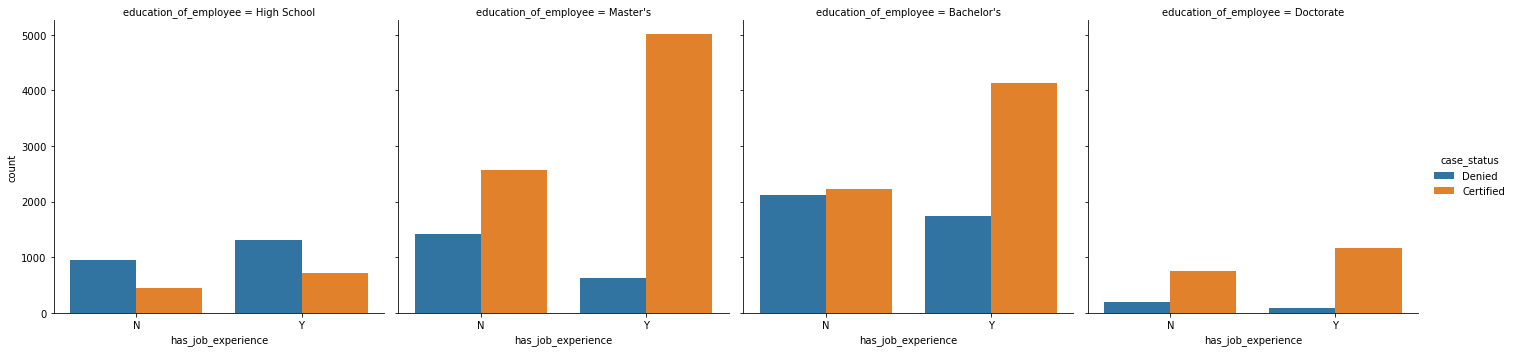%0A)

In \[34\]:

    # Checking case status against training requirement and experience:
    sns.catplot(x="requires_job_training",
                   hue="case_status", 
                   col="has_job_experience", 
                   data=data, 
                   kind="count");

![](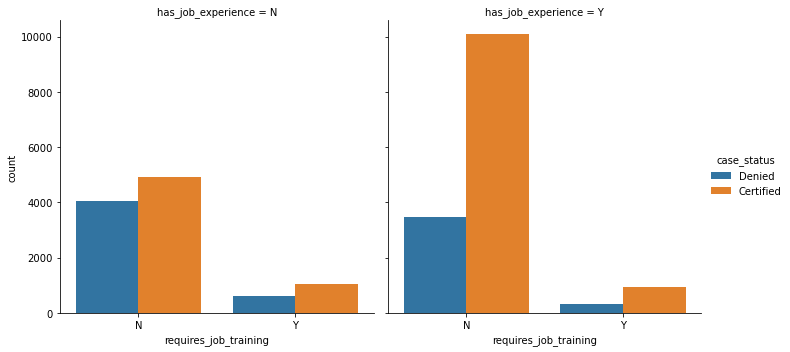%0A)

In \[35\]:

    # Checking case status against training requirement and education:
    sns.catplot(x="requires_job_training",
                   hue="case_status", 
                   col="education_of_employee", 
                   data=data, 
                   kind="count");

![](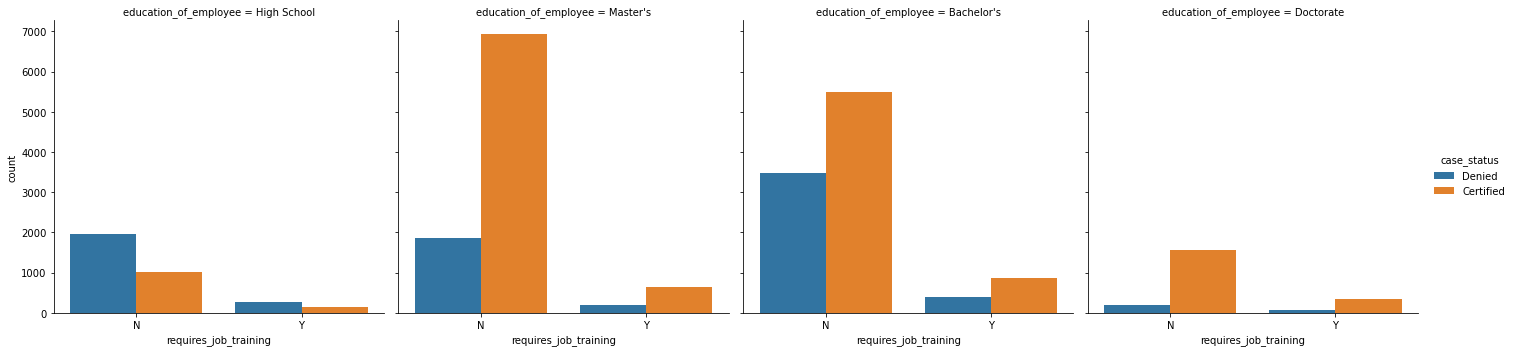%0A)

In \[36\]:

    # Checking case status against continent and education:
    sns.catplot(x="education_of_employee",
                   hue="case_status", 
                   col="continent", 
                   data=data, 
                   kind="count", height = 4, aspect = 1);

![](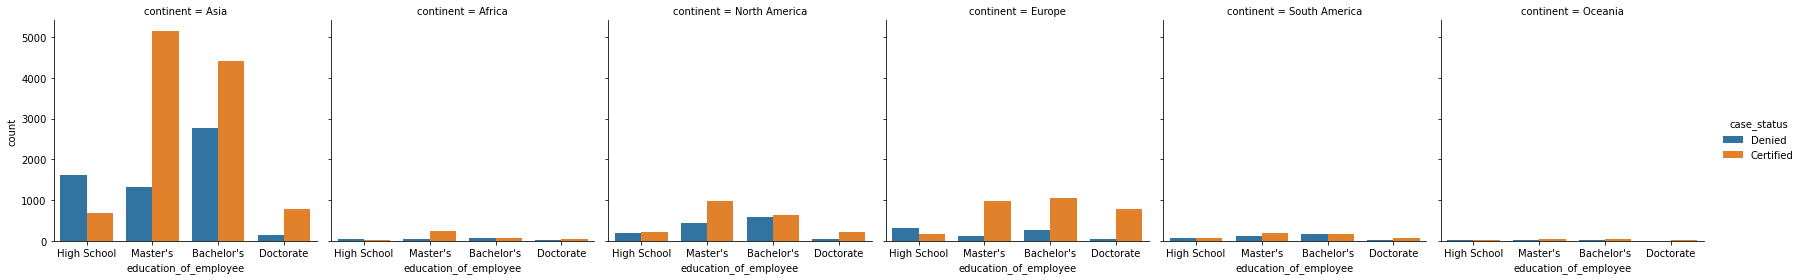%0A)

In \[37\]:

    # Checking case status against wage unite and education:
    sns.catplot(x="education_of_employee",
                   hue="case_status", 
                   col="unit_of_wage", 
                   data=data, 
                   kind="count");

![](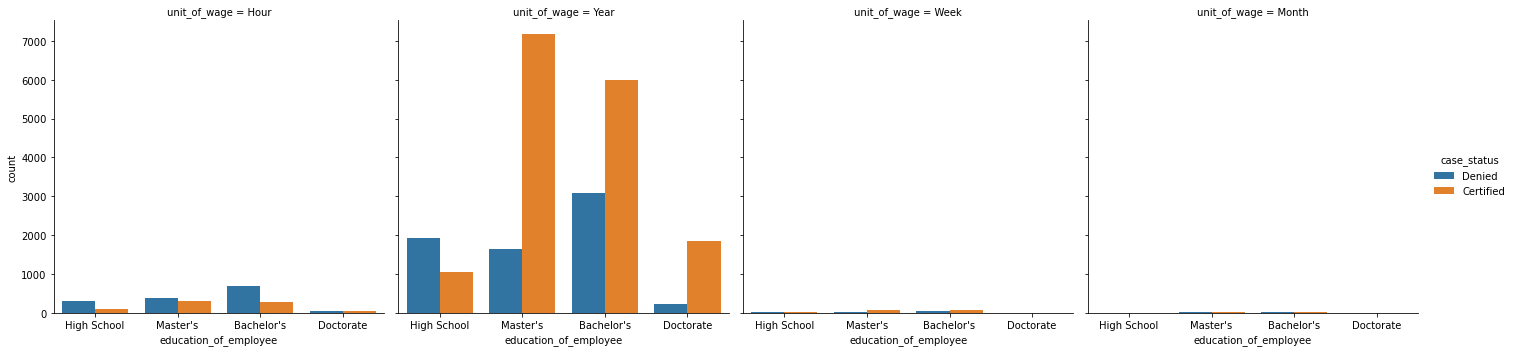%0A)

In \[38\]:

    #Checking case status against job experience and unit of wage:
    sns.catplot(x="has_job_experience",
                   hue="case_status", 
                   col="unit_of_wage", 
                   data=data, 
                   kind="count");

![](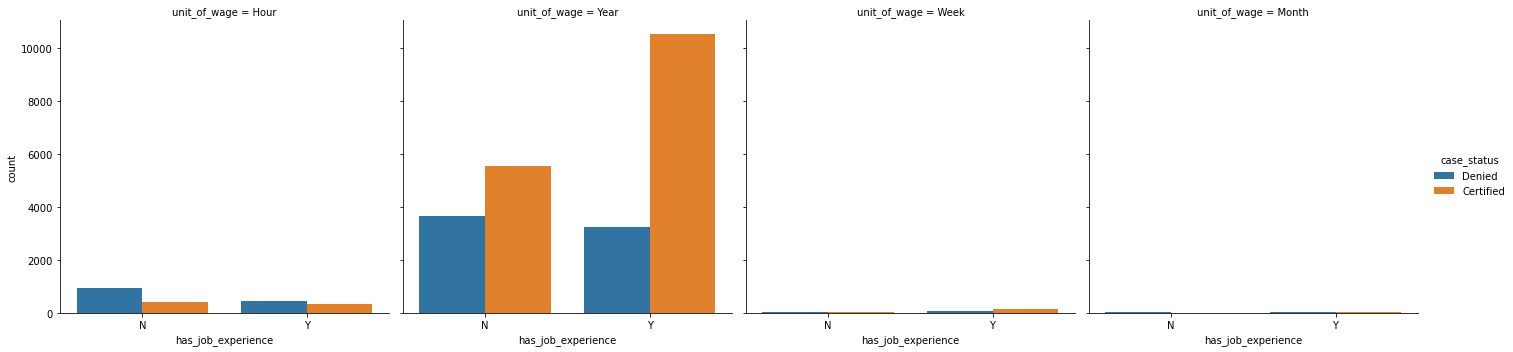%0A)

In \[39\]:

    # Check prevailing wage against the employee education and case status
    plt.figure(figsize=(10,7))
    sns.stripplot(data['education_of_employee'], data['prevailing_wage'], hue=data['case_status']);

![](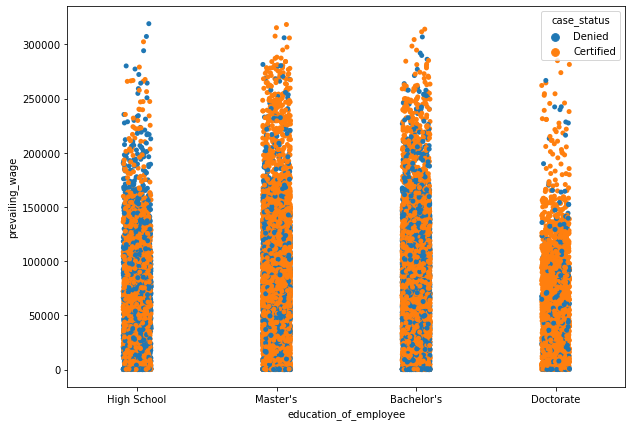%0A)

In \[40\]:

    plt.figure(figsize=(10,7))
    sns.stripplot(data['region_of_employment'], data['prevailing_wage'], hue=data['case_status']);

![](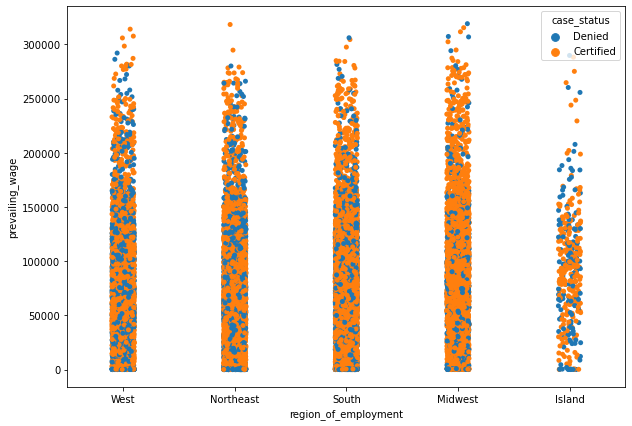%0A)

In \[41\]:

    plt.figure(figsize=(10,7))
    sns.stripplot(data['full_time_position'], data['prevailing_wage'], hue=data['case_status']);

![](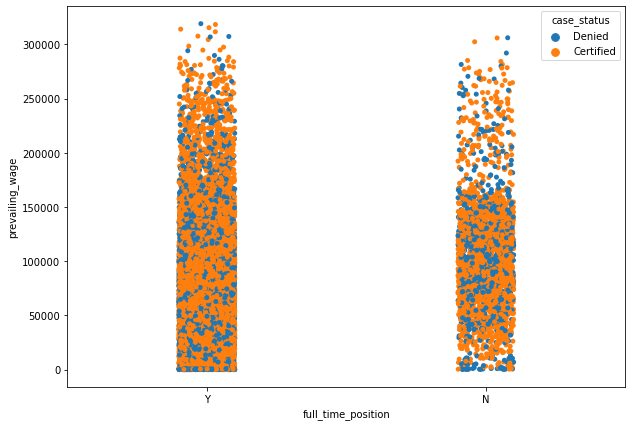%0A)

In \[42\]:

    # Case status against prevailing wage:
    plt.figure(figsize=(10,7))
    sns.stripplot(data['case_status'], data['prevailing_wage']);

![](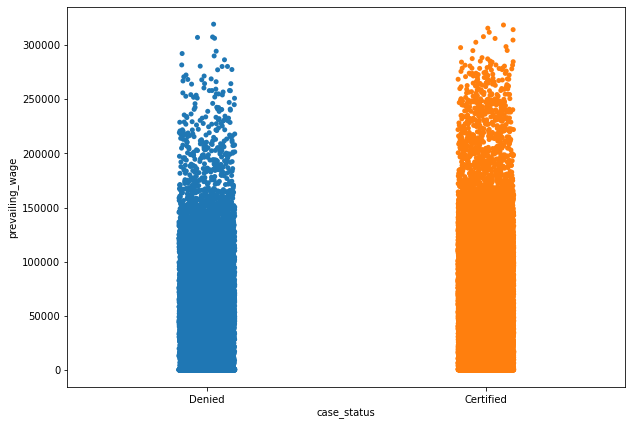%0A)

In \[43\]:

    # Re-chek using boxplots:
    plt.figure(figsize=(10,7))
    sns.boxplot(data['case_status'], data["prevailing_wage"]);

![](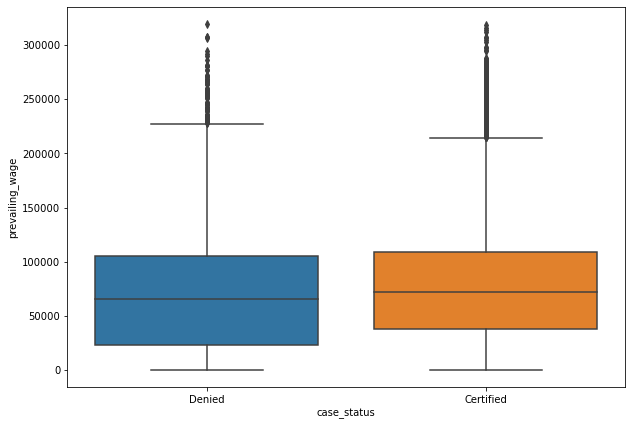%0A)

In \[44\]:

    #Distribution of wages across the years:
    plt.figure(figsize=(10,7))
    sns.scatterplot(data['yr_of_estab'], data['prevailing_wage'], hue = data['case_status']);

![](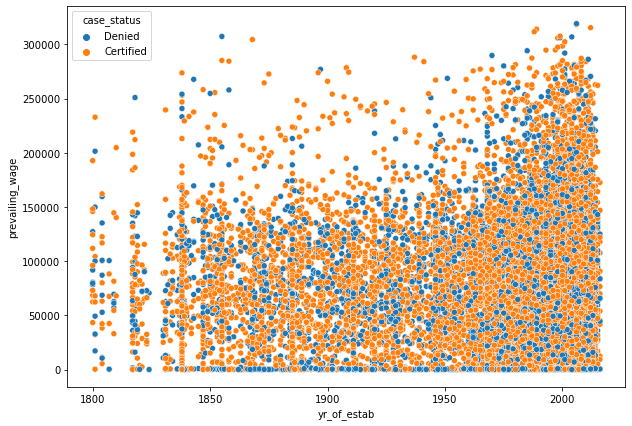%0A)

In \[45\]:

    # To see the distribution of employees across the years:
    plt.figure(figsize=(10,7))
    sns.scatterplot(data['yr_of_estab'], data['no_of_employees'], hue= data['case_status']);

![](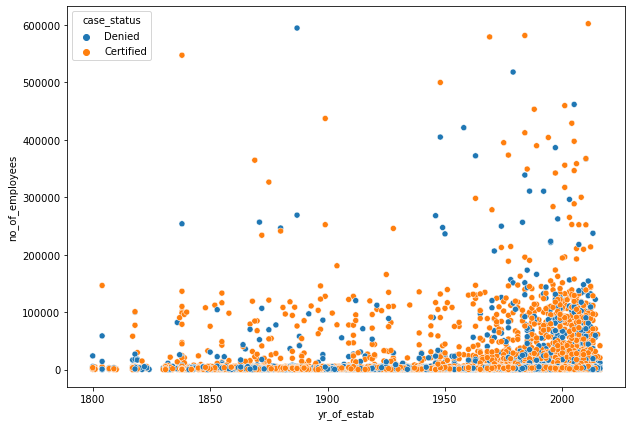%0A)

In \[46\]:

    plt.figure(figsize=(10,7))
    sns.stripplot(data['region_of_employment'], data['no_of_employees'], hue=data['case_status']);

![](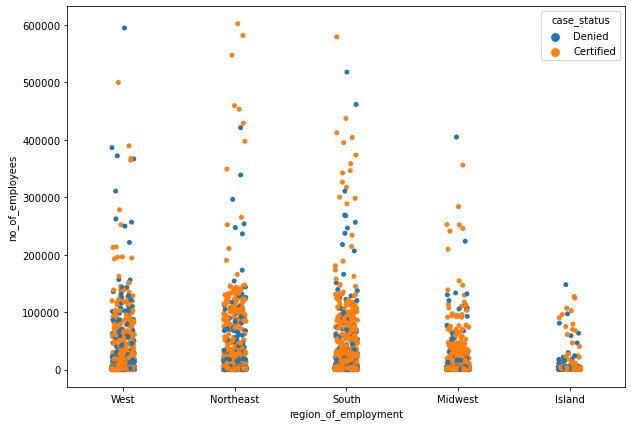%0A)

**Observations:**

1.  Master's holders get more visa certifications whether they have
    experience or not. Bachelor's degree employees have an almost equal
    chance of denial or certification when they have no work experience.
2.  Fewer employees require training whether or not they have job
    experience but far fewer people with experience require training.
3.  Asia leads with the highest number of masters and bachelor's
    employees with visa certifications. Europe has slightly more
    Bachelor's than North America.
4.  Yearly wages are most popular regardless of education and
    experience.
5.  Contrary to earlier suspicions, prevailing wages are spread almost
    uniformly across education, regions and visa status(this could be
    attributed to regulations).
6.  Prevailing wages increase as the companies get newer.
7.  Newer companies appear to hire a lot more employees.
8.  More people in full time positions earn more.

**Leading Questions**:

1.  Those with higher education may want to travel abroad for a
    well-paid job. Does education play a role in Visa certification?

2.  How does the visa status vary across different continents?

3.  Experienced professionals might look abroad for opportunities to
    improve their lifestyles and career development. Does work
    experience influence visa status?

4.  In the United States, employees are paid at different intervals.
    Which pay unit is most likely to be certified for a visa?

5.  The US government has established a prevailing wage to protect local
    talent and foreign workers. How does the visa status change with the
    prevailing wage?

### Answers:<a href="#Answers:" class="anchor-link">¶</a>

**1. Education does play a role in visa certifications. Master's and
Bachelor's degree holders are more likely to get visa certifications
than others.**

**2. Asia has the highest number of visa certifications followed by
Europe. Asia also holds the highest number of denials followed by North
America. Africa and Oceania are at the bottom of the list with very few
visa certifications.**

**3. Work experience greatly influences visa status. Far more visa
certifications went to employees with work experience.**

**4. The yearly wage unit is most likely to be certified.**

**5. The Visa status doesn't vary much with prevailing wages. Denials
are only very slightly lower than certifications with visible outliers
on both observations.**

Data Preprocessing<a href="#Data-Preprocessing" class="anchor-link">¶</a>
-------------------------------------------------------------------------

#### Convert the relevant variables to 'Category':<a href="#Convert-the-relevant-variables-to-&#39;Category&#39;:" class="anchor-link">¶</a>

In \[47\]:

    for colname in cat_cols:
        data[colname] = data[colname].astype("category")

    data.info()

    <class 'pandas.core.frame.DataFrame'>
    RangeIndex: 25480 entries, 0 to 25479
    Data columns (total 11 columns):
     #   Column                 Non-Null Count  Dtype   
    ---  ------                 --------------  -----   
     0   continent              25480 non-null  category
     1   education_of_employee  25480 non-null  category
     2   has_job_experience     25480 non-null  category
     3   requires_job_training  25480 non-null  category
     4   no_of_employees        25480 non-null  int64   
     5   yr_of_estab            25480 non-null  int64   
     6   region_of_employment   25480 non-null  category
     7   prevailing_wage        25480 non-null  float64 
     8   unit_of_wage           25480 non-null  category
     9   full_time_position     25480 non-null  category
     10  case_status            25480 non-null  category
    dtypes: category(8), float64(1), int64(2)
    memory usage: 797.5 KB

In \[48\]:

    data["case_status"] = data["case_status"].apply(lambda x: 1 if x == "Certified" else 0)

Model evaluation criterion<a href="#Model-evaluation-criterion" class="anchor-link">¶</a>
-----------------------------------------------------------------------------------------

OFLC is interested in shortlisting candidates that have a higher chance
of Visa approval.

### A model can make wrong predictions such as:<a href="#A-model-can-make-wrong-predictions-such-as:" class="anchor-link">¶</a>

1.  Predicting a candidate will get their Visa certified when it gets
    denied.
2.  Predicting a candidate will not get a Visa cerrtified and they do.

### Which case is more important?<a href="#Which-case-is-more-important?" class="anchor-link">¶</a>

1.  If the model predicts a Visa certification the gets denied, the
    recruitment process is prolonged and more resources go into
    reapplications, finding new candidates, interviews etc.
2.  If the model predicts a denial that gets granted a Visa, chances are
    that the candidate could be placed in a position that they may be
    underqualified or overqualified for. They may require training or
    not. The costs of this error are not as dire as the first. \#\#\#
    Which metric to optimize?

-   We would want Recall to be maximized, the greater the Recall, higher
    the chances of predicting Visa certifications more accurately.

Building bagging and boosting models<a href="#Building-bagging-and-boosting-models" class="anchor-link">¶</a>
-------------------------------------------------------------------------------------------------------------

**Let's define a function to provide metric scores on the train and test
set and a function to show confusion matrix so that we do not have to
use the same code repetitively while evaluating models:**

In \[49\]:

    # Defining a function to compute different metrics to check performance of a classification model built using sklearn
    def model_performance_classification_sklearn(model, predictors, target):
        """
        Function to compute different metrics to check classification model performance

        model: classifier
        predictors: independent variables
        target: dependent variable
        """

        # predicting using the independent variables
        pred = model.predict(predictors)

        acc = accuracy_score(target, pred)  # to compute Accuracy
        recall = recall_score(target, pred)  # to compute Recall
        precision = precision_score(target, pred)  # to compute Precision
        f1 = f1_score(target, pred)  # to compute F1-score

        # creating a dataframe of metrics
        df_perf = pd.DataFrame(
            {
                "Accuracy": acc,
                "Recall": recall,
                "Precision": precision,
                "F1": f1,
            },
            index=[0],
        )

        return df_perf

In \[50\]:

    def confusion_matrix_sklearn(model, predictors, target):
        """
        To plot the confusion_matrix with percentages

        model: classifier
        predictors: independent variables
        target: dependent variable
        """
        y_pred = model.predict(predictors)
        cm = confusion_matrix(target, y_pred)
        labels = np.asarray(
            [
                ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
                for item in cm.flatten()
            ]
        ).reshape(2, 2)

        plt.figure(figsize=(6, 4))
        sns.heatmap(cm, annot=labels, fmt="")
        plt.ylabel("True label")
        plt.xlabel("Predicted label")

In \[51\]:

    # Separating features and the target column:
    X = data.drop(["case_status"], axis=1)  # Set features
    y = data["case_status"]  # Labels (Target Variable)

    X = pd.get_dummies(X, drop_first=True)

In \[52\]:

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)
    print(X_train.shape, X_test.shape)

    (17836, 21) (7644, 21)

In \[53\]:

    print("Percentage of classes in training set:")
    print(y_train.value_counts(normalize=True))
    print("Percentage of classes in test set:")
    print(y_test.value_counts(normalize=True))

    Percentage of classes in training set:
    1    0.667919
    0    0.332081
    Name: case_status, dtype: float64
    Percentage of classes in test set:
    1    0.667844
    0    0.332156
    Name: case_status, dtype: float64

Decision Tree<a href="#Decision-Tree" class="anchor-link">¶</a>
---------------------------------------------------------------

In \[54\]:

    #Fitting the model
    d_tree = DecisionTreeClassifier(random_state=1)
    d_tree.fit(X_train,y_train)

    #Calculating different metrics
    d_tree_model_train_perf=model_performance_classification_sklearn(d_tree,X_train,y_train)
    print("Training performance:\n",d_tree_model_train_perf)
    d_tree_model_test_perf=model_performance_classification_sklearn(d_tree,X_test,y_test)
    print("Testing performance:\n",d_tree_model_test_perf)

    #Creating confusion matrix
    confusion_matrix_sklearn(d_tree,X_test,y_test)

    Training performance:
        Accuracy  Recall  Precision   F1
    0       1.0     1.0        1.0  1.0
    Testing performance:
        Accuracy    Recall  Precision        F1
    0  0.664443  0.742605   0.751884  0.747216

![](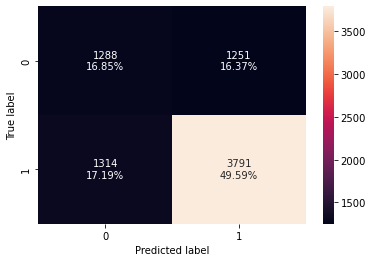%0A)

-   The Decision Tree overfits on training data and does not do too well
    on test data. The Accuracy is low. Recall is not so great either.

Bagging Classifier<a href="#Bagging-Classifier" class="anchor-link">¶</a>
-------------------------------------------------------------------------

In \[55\]:

    #Fitting the model
    bagging_classifier = BaggingClassifier(random_state=1)
    bagging_classifier.fit(X_train,y_train)

    #Calculating different metrics
    bagging_classifier_model_train_perf=model_performance_classification_sklearn(bagging_classifier,X_train,y_train)
    print(bagging_classifier_model_train_perf)
    bagging_classifier_model_test_perf=model_performance_classification_sklearn(bagging_classifier,X_test,y_test)
    print(bagging_classifier_model_test_perf)

    #Creating confusion matrix
    confusion_matrix_sklearn(bagging_classifier,X_test,y_test)

       Accuracy    Recall  Precision        F1
    0  0.985367  0.986317   0.991729  0.989016
       Accuracy    Recall  Precision        F1
    0  0.692177  0.766112     0.7714  0.768747

![](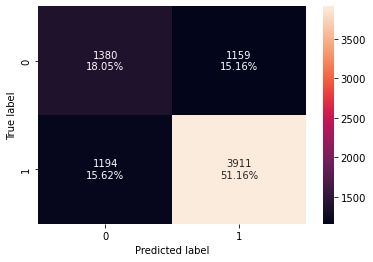%0A)

-   Still overfitting but with slightly better performance on the test
    data, the Bagging Clssifier still fares low on Accuracy.

Random Forest Classifier<a href="#Random-Forest-Classifier" class="anchor-link">¶</a>
-------------------------------------------------------------------------------------

In \[56\]:

    #Fitting the model
    rf_estimator = RandomForestClassifier(random_state=1)
    rf_estimator.fit(X_train,y_train)

    #Calculating different metrics
    rf_estimator_model_train_perf=model_performance_classification_sklearn(rf_estimator,X_train,y_train)
    print("Training performance:\n",rf_estimator_model_train_perf)
    rf_estimator_model_test_perf=model_performance_classification_sklearn(rf_estimator,X_test,y_test)
    print("Testing performance:\n",rf_estimator_model_test_perf)

    #Creating confusion matrix
    confusion_matrix_sklearn(rf_estimator,X_test,y_test)

    Training performance:
        Accuracy    Recall  Precision        F1
    0  0.999944  0.999916        1.0  0.999958
    Testing performance:
        Accuracy    Recall  Precision        F1
    0  0.719126  0.830167   0.768032  0.797891

![](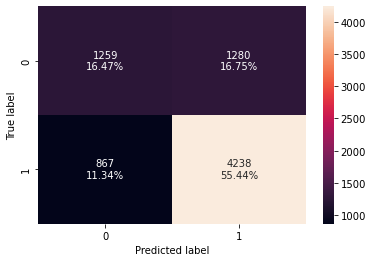%0A)

-   So far giving the best pre-tuning performance on test data, Random
    Forest gives the best Accuracy and Recall scores.

AdaBoost Classifier<a href="#AdaBoost-Classifier" class="anchor-link">¶</a>
---------------------------------------------------------------------------

In \[57\]:

    #Fitting the model
    ab_classifier = AdaBoostClassifier(random_state=1)
    ab_classifier.fit(X_train,y_train)

    #Calculating different metrics
    ab_classifier_model_train_perf=model_performance_classification_sklearn(ab_classifier,X_train,y_train)
    print(ab_classifier_model_train_perf)
    ab_classifier_model_test_perf=model_performance_classification_sklearn(ab_classifier,X_test,y_test)
    print(ab_classifier_model_test_perf)

    #Creating confusion matrix
    confusion_matrix_sklearn(ab_classifier,X_test,y_test)

       Accuracy    Recall  Precision        F1
    0  0.738058  0.887434   0.760411  0.819027
       Accuracy    Recall  Precision        F1
    0  0.732993  0.885015    0.75653  0.815744

![](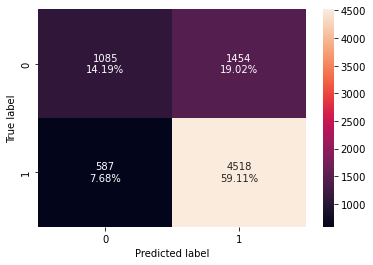%0A)

-   AdaBoost outperforms RandomForest and appears to be fitting better
    even on training data.

Gradient Boost Classifier<a href="#Gradient-Boost-Classifier" class="anchor-link">¶</a>
---------------------------------------------------------------------------------------

In \[58\]:

    #Fitting the model
    gb_classifier = GradientBoostingClassifier(random_state=1)
    gb_classifier.fit(X_train,y_train)

    #Calculating different metrics
    gb_classifier_model_train_perf=model_performance_classification_sklearn(gb_classifier,X_train,y_train)
    print("Training performance:\n",gb_classifier_model_train_perf)
    gb_classifier_model_test_perf=model_performance_classification_sklearn(gb_classifier,X_test,y_test)
    print("Testing performance:\n",gb_classifier_model_test_perf)

    #Creating confusion matrix
    confusion_matrix_sklearn(gb_classifier,X_test,y_test)

    Training performance:
        Accuracy    Recall  Precision        F1
    0  0.759419  0.882901   0.784106  0.830576
    Testing performance:
        Accuracy    Recall  Precision       F1
    0  0.744636  0.873262   0.773555  0.82039

![](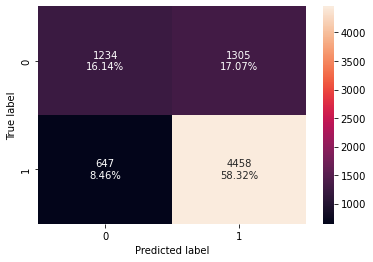%0A)

-   Gradient Boost has the best F1 and accuracy but a slightly lower
    Recall than AdaBoost.

Will tuning the hyperparameters improve the model performance?<a href="#Will-tuning-the-hyperparameters-improve-the-model-performance?" class="anchor-link">¶</a>
-----------------------------------------------------------------------------------------------------------------------------------------------------------------

### Using GridSearch for hyperparameter tuning, let's find out if this will improve model performances.<a href="#Using-GridSearch-for-hyperparameter-tuning,-let&#39;s-find-out-if-this-will-improve-model--performances." class="anchor-link">¶</a>

### Hyperparameter Tuning Decision Tree Classifier:<a href="#Hyperparameter-Tuning-Decision-Tree-Classifier:" class="anchor-link">¶</a>

In \[59\]:

    #Choose the type of classifier. 
    dtree_estimator = DecisionTreeClassifier(class_weight={0:0.18,1:0.82},random_state=1)

    # Grid of parameters to choose from
    parameters = {'max_depth': np.arange(2,30), 
                  'min_samples_leaf': [1, 2, 5, 7, 10],
                  'max_leaf_nodes' : [2, 3, 5, 10,15],
                  'min_impurity_decrease': [0.0001,0.001,0.01,0.1]
                 }

    # Type of scoring used to compare parameter combinations
    scorer = metrics.make_scorer(metrics.recall_score)

    # Run the grid search
    grid_obj = GridSearchCV(dtree_estimator, parameters, scoring=scorer,n_jobs=-1)
    grid_obj = grid_obj.fit(X_train, y_train)

    # Set the clf to the best combination of parameters
    dtree_estimator = grid_obj.best_estimator_

    # Fit the best algorithm to the data. 
    dtree_estimator.fit(X_train, y_train)

Out\[59\]:

    DecisionTreeClassifier(class_weight={0: 0.18, 1: 0.82}, max_depth=2,
                           max_leaf_nodes=2, min_impurity_decrease=0.0001,
                           random_state=1)

In \[60\]:

    #Calculating different metrics
    dtree_estimator_model_train_perf = model_performance_classification_sklearn(dtree_estimator,X_train,y_train)
    print("Training performance:\n",dtree_estimator_model_train_perf)
    dtree_estimator_model_test_perf = model_performance_classification_sklearn(dtree_estimator,X_test,y_test)
    print("Testing performance:\n",dtree_estimator_model_test_perf)

    #Creating confusion matrix
    confusion_matrix_sklearn(dtree_estimator,X_test,y_test)

    Training performance:
        Accuracy  Recall  Precision        F1
    0  0.667919     1.0   0.667919  0.800901
    Testing performance:
        Accuracy  Recall  Precision        F1
    0  0.667844     1.0   0.667844  0.800847

![](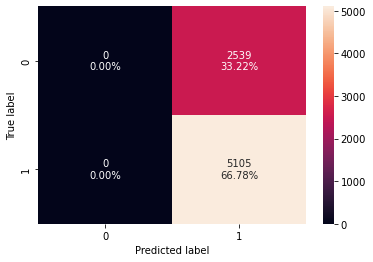%0A)

-   After hyperparameter tuning, Accuracy and Precision have suffered
    for higher Recall and F1 scores on the test data.
-   Model still overfits.

### Hyperparameter Tuning Bagging Classifier:<a href="#Hyperparameter-Tuning-Bagging-Classifier:" class="anchor-link">¶</a>

In \[61\]:

    # Choose the type of classifier. 
    bagging_estimator_tuned = BaggingClassifier(random_state=1)

    # Grid of parameters to choose from
    parameters = {'max_samples': [0.7,0.8,0.9,1], 
                  'max_features': [0.7,0.8,0.9,1],
                  'n_estimators' : [10,20,30,40,50],
                 }

    # Type of scoring used to compare parameter combinations
    scorer = metrics.make_scorer(metrics.recall_score)

    # Run the grid search
    grid_obj = GridSearchCV(bagging_estimator_tuned, parameters, scoring=scorer,cv=5)
    grid_obj = grid_obj.fit(X_train, y_train)

    # Set the clf to the best combination of parameters
    bagging_estimator_tuned = grid_obj.best_estimator_

    # Fit the best algorithm to the data.
    bagging_estimator_tuned.fit(X_train, y_train)

Out\[61\]:

    BaggingClassifier(max_features=0.7, max_samples=1, n_estimators=20,
                      random_state=1)

In \[62\]:

    #Calculating different metrics
    bagging_estimator_tuned_model_train_perf=model_performance_classification_sklearn(bagging_estimator_tuned,X_train,y_train)
    print(bagging_estimator_tuned_model_train_perf)
    bagging_estimator_tuned_model_test_perf=model_performance_classification_sklearn(bagging_estimator_tuned,X_test,y_test)
    print(bagging_estimator_tuned_model_test_perf)

    #Creating confusion matrix
    confusion_matrix_sklearn(bagging_estimator_tuned,X_test,y_test)

       Accuracy  Recall  Precision        F1
    0  0.667919     1.0   0.667919  0.800901
       Accuracy  Recall  Precision        F1
    0  0.667844     1.0   0.667844  0.800847

![](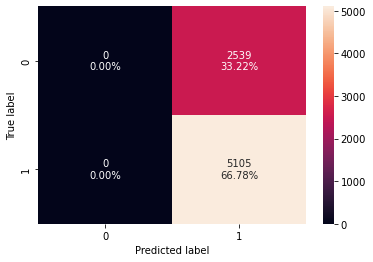%0A)

-   Tuning gives an identical performance on Test and Training data.
    Accuracy and Precision are low while Recall is overfitting.
-   The model does not find any negatives meaning that there are a lot
    of false positives which will be bad for the business.

### Hyperparameter Tuning Random Forest Classifier:<a href="#Hyperparameter-Tuning-Random-Forest-Classifier:" class="anchor-link">¶</a>

In \[63\]:

    # Choose the type of classifier. 
    rf_tuned = RandomForestClassifier(random_state=1)

    parameters = {  
                    'max_depth': list(np.arange(5,30,5)) + [None],
                    'max_features': ['sqrt','log2',None],
                    'min_samples_leaf': np.arange(1,15,5),
                    'min_samples_split': np.arange(2, 20, 5),
                    'n_estimators': np.arange(10,110,10)}

    # Type of scoring used to compare parameter combinations
    scorer = metrics.make_scorer(metrics.recall_score)

    # Run the grid search
    grid_obj = GridSearchCV(rf_tuned, parameters, scoring=scorer, cv=5,n_jobs=-1)
    grid_obj = grid_obj.fit(X_train, y_train)

    # Set the clf to the best combination of parameters
    rf_tuned = grid_obj.best_estimator_

    # Fit the best algorithm to the data. 
    rf_tuned.fit(X_train, y_train)

Out\[63\]:

    RandomForestClassifier(max_depth=5, max_features='sqrt', min_samples_split=12,
                           n_estimators=10, random_state=1)

In \[64\]:

    #Calculating different metrics
    rf_tuned_model_train_perf=model_performance_classification_sklearn(rf_tuned,X_train,y_train)
    print("Training performance:\n",rf_tuned_model_train_perf)
    rf_tuned_model_test_perf=model_performance_classification_sklearn(rf_tuned,X_test,y_test)
    print("Testing performance:\n",rf_tuned_model_test_perf)

    #Creating confusion matrix
    confusion_matrix_sklearn(rf_tuned,X_test,y_test)

    Training performance:
        Accuracy    Recall  Precision        F1
    0  0.735815  0.922186   0.743755  0.823415
    Testing performance:
        Accuracy    Recall  Precision        F1
    0  0.726975  0.921254   0.736224  0.818411

![](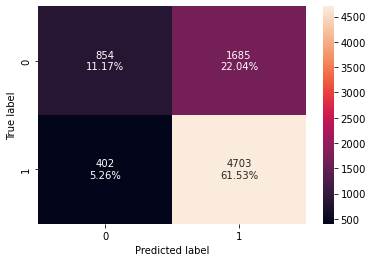%0A)

-   Tuning the random forest model give a more generalised performance
    on the training and test performance. Accuracy is lower on the test
    data but Recall is high on both.

### Hyperparameter Tuning AdaBoost Classifier:<a href="#Hyperparameter-Tuning-AdaBoost-Classifier:" class="anchor-link">¶</a>

In \[65\]:

    # Choose the type of classifier. 
    abc_tuned = AdaBoostClassifier(random_state=1)

    # Grid of parameters to choose from
    parameters = {
        #Let's try different max_depth for base_estimator
        "base_estimator":[DecisionTreeClassifier(max_depth=1),DecisionTreeClassifier(max_depth=2),
                          DecisionTreeClassifier(max_depth=3)],
        "n_estimators": np.arange(10,110,10),
        "learning_rate":np.arange(0.1,2,0.1)
    }

    # Type of scoring used to compare parameter  combinations
    scorer = metrics.make_scorer(metrics.recall_score)

    # Run the grid search
    grid_obj = GridSearchCV(abc_tuned, parameters, scoring=scorer,cv=5)
    grid_obj = grid_obj.fit(X_train, y_train)

    # Set the clf to the best combination of parameters
    abc_tuned = grid_obj.best_estimator_

    # Fit the best algorithm to the data.
    abc_tuned.fit(X_train, y_train)

Out\[65\]:

    AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                       learning_rate=0.2, n_estimators=10, random_state=1)

In \[66\]:

    #Calculating different metrics
    abc_tuned_model_train_perf=model_performance_classification_sklearn(abc_tuned,X_train,y_train)
    print(abc_tuned_model_train_perf)
    abc_tuned_model_test_perf=model_performance_classification_sklearn(abc_tuned,X_test,y_test)
    print(abc_tuned_model_test_perf)

    #Creating confusion matrix
    confusion_matrix_sklearn(abc_tuned,X_test,y_test)

       Accuracy   Recall  Precision        F1
    0  0.691915  0.97146   0.691834  0.808142
       Accuracy    Recall  Precision        F1
    0  0.690607  0.971988   0.690702  0.807551

![](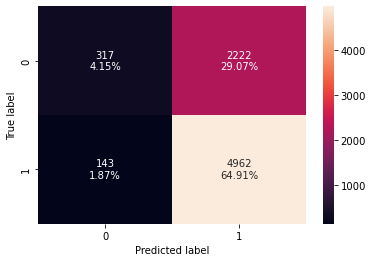%0A)

-   Tuned AdaBoost performs poorer than its pretuned counterpart. Though
    maintaining a high Recall and F1, Accuracy and Precision suffer.
-   The model identifies more True Positives but also holds a
    considerably high amount of false positives. Not the best model to
    adopt

### Hyperparameter Tuning Gradient Boost Classifier:<a href="#Hyperparameter-Tuning-Gradient-Boost-Classifier:" class="anchor-link">¶</a>

In \[67\]:

    # Choose the type of classifier. 
    gbc_tuned = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)

    # Grid of parameters to choose from
    parameters = {
        "n_estimators": [100,150,200,250],
        "subsample":[0.8,0.9,1],
        "max_features":[0.7,0.8,0.9,1]
    }

    # Type of scoring used to compare parameter combinations
    scorer = metrics.make_scorer(metrics.recall_score)

    # Run the grid search
    grid_obj = GridSearchCV(gbc_tuned, parameters, scoring=scorer,cv=5)
    grid_obj = grid_obj.fit(X_train, y_train)

    # Set the clf to the best combination of parameters
    gbc_tuned = grid_obj.best_estimator_

    # Fit the best algorithm to the data.
    gbc_tuned.fit(X_train, y_train)

Out\[67\]:

    GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                               max_features=1, random_state=1, subsample=1)

In \[68\]:

    #Calculating different metrics
    gbc_tuned_model_train_perf=model_performance_classification_sklearn(gbc_tuned,X_train,y_train)
    print("Training performance:\n",gbc_tuned_model_train_perf)
    gbc_tuned_model_test_perf=model_performance_classification_sklearn(gbc_tuned,X_test,y_test)
    print("Testing performance:\n",gbc_tuned_model_test_perf)

    #Creating confusion matrix
    confusion_matrix_sklearn(gbc_tuned,X_test,y_test)

    Training performance:
        Accuracy    Recall  Precision        F1
    0  0.734638  0.920759   0.743258  0.822541
    Testing performance:
        Accuracy    Recall  Precision        F1
    0  0.724882  0.916944   0.736006  0.816572

![](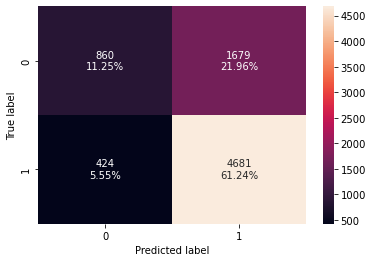%0A)

-   Tuning costs this model on precision and accuracy. Considerably
    better recall.

-   This model identifies a good number of true positives, which is
    desirable but the false positives can be better. Fortunately F1 is
    not bad for this model.

Stacking Classifier<a href="#Stacking-Classifier" class="anchor-link">¶</a>
---------------------------------------------------------------------------

In \[69\]:

    estimators = [('Random Forest',rf_tuned), ('Gradient Boosting',gbc_tuned), ('Decision Tree',dtree_estimator)]

    final_estimator = gbc_tuned

    stacking_classifier= StackingClassifier(estimators=estimators,final_estimator=final_estimator)

    stacking_classifier.fit(X_train,y_train)

Out\[69\]:

    StackingClassifier(estimators=[('Random Forest',
                                    RandomForestClassifier(max_depth=5,
                                                           max_features='sqrt',
                                                           min_samples_split=12,
                                                           n_estimators=10,
                                                           random_state=1)),
                                   ('Gradient Boosting',
                                    GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                                                               max_features=1,
                                                               random_state=1,
                                                               subsample=1)),
                                   ('Decision Tree',
                                    DecisionTreeClassifier(class_weight={0: 0.18,
                                                                         1: 0.82},
                                                           max_depth=2,
                                                           max_leaf_nodes=2,
                                                           min_impurity_decrease=0.0001,
                                                           random_state=1))],
                       final_estimator=GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                                                                  max_features=1,
                                                                  random_state=1,
                                                                  subsample=1))

In \[70\]:

    #Calculating different metrics
    stacking_classifier_model_train_perf=model_performance_classification_sklearn(stacking_classifier,X_train,y_train)
    print("Training performance:\n",stacking_classifier_model_train_perf)
    stacking_classifier_model_test_perf=model_performance_classification_sklearn(stacking_classifier,X_test,y_test)
    print("Testing performance:\n",stacking_classifier_model_test_perf)

    #Creating confusion matrix
    confusion_matrix_sklearn(stacking_classifier,X_test,y_test)

    Training performance:
        Accuracy    Recall  Precision        F1
    0  0.748542  0.869806   0.779332  0.822087
    Testing performance:
        Accuracy    Recall  Precision        F1
    0  0.740058  0.865426   0.772648  0.816409

![](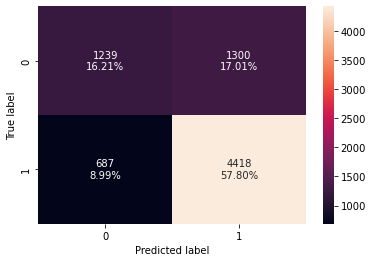%0A)

-   This model does not overfit and gives a more generalised
    performance.
-   It has fewer false positives slipping through but recall can be
    better.

### Hyperparameter Tuning did help reduce overfitting for most of the models but it did not always improve model performance. This is of course expected as one wil need to tune and retune hyperparameters for some models to get the best results.<a href="#Hyperparameter-Tuning-did-help-reduce-overfitting-for-most-of-the-models-but-it-did-not-always-improve-model-performance.-This-is-of-course-expected-as-one-wil-need-to-tune-and-retune-hyperparameters-for-some-models-to-get-the-best-results." class="anchor-link">¶</a>

Model Performance Comparison and Conclusions<a href="#Model-Performance-Comparison-and-Conclusions" class="anchor-link">¶</a>
-----------------------------------------------------------------------------------------------------------------------------

In \[71\]:

    # training performance comparison

    models_train_comp_df = pd.concat(
        [d_tree_model_train_perf.T,dtree_estimator_model_train_perf.T,rf_estimator_model_train_perf.T,rf_tuned_model_train_perf.T,
         bagging_classifier_model_train_perf.T,bagging_estimator_tuned_model_train_perf.T,ab_classifier_model_train_perf.T,
         abc_tuned_model_train_perf.T,gb_classifier_model_train_perf.T,gbc_tuned_model_train_perf.T,stacking_classifier_model_train_perf.T],
        axis=1,
    )
    models_train_comp_df.columns = [
        "Decision Tree",
        "Decision Tree Estimator",
        "Random Forest Estimator",
        "Random Forest Tuned",
        "Bagging Classifier",
        "Bagging Estimator Tuned",
        "Adaboost Classifier",
        "Adabosst Classifier Tuned",
        "Gradient Boost Classifier",
        "Gradient Boost Classifier Tuned",
        "Stacking Classifier"]
    print("Training performance comparison:")
    models_train_comp_df

    Training performance comparison:

Out\[71\]:

|           | Decision Tree | Decision Tree Estimator | Random Forest Estimator | Random Forest Tuned | Bagging Classifier | Bagging Estimator Tuned | Adaboost Classifier | Adabosst Classifier Tuned | Gradient Boost Classifier | Gradient Boost Classifier Tuned | Stacking Classifier |
|-----------|---------------|-------------------------|-------------------------|---------------------|--------------------|-------------------------|---------------------|---------------------------|---------------------------|---------------------------------|---------------------|
| Accuracy  | 1.0           | 0.667919                | 0.999944                | 0.735815            | 0.985367           | 0.667919                | 0.738058            | 0.691915                  | 0.759419                  | 0.734638                        | 0.748542            |
| Recall    | 1.0           | 1.000000                | 0.999916                | 0.922186            | 0.986317           | 1.000000                | 0.887434            | 0.971460                  | 0.882901                  | 0.920759                        | 0.869806            |
| Precision | 1.0           | 0.667919                | 1.000000                | 0.743755            | 0.991729           | 0.667919                | 0.760411            | 0.691834                  | 0.784106                  | 0.743258                        | 0.779332            |
| F1        | 1.0           | 0.800901                | 0.999958                | 0.823415            | 0.989016           | 0.800901                | 0.819027            | 0.808142                  | 0.830576                  | 0.822541                        | 0.822087            |

In \[72\]:

    # testing performance comparison

    models_test_comp_df = pd.concat(
        [d_tree_model_test_perf.T,dtree_estimator_model_test_perf.T,rf_estimator_model_test_perf.T,rf_tuned_model_test_perf.T,
         bagging_classifier_model_test_perf.T,bagging_estimator_tuned_model_test_perf.T,ab_classifier_model_test_perf.T,
         abc_tuned_model_test_perf.T,gb_classifier_model_test_perf.T,gbc_tuned_model_test_perf.T,stacking_classifier_model_test_perf.T],
        axis=1,
    )
    models_test_comp_df.columns = [
        "Decision Tree",
        "Decision Tree Estimator",
        "Random Forest Estimator",
        "Random Forest Tuned",
        "Bagging Classifier",
        "Bagging Estimator Tuned",
        "Adaboost Classifier",
        "Adaboost Classifier Tuned",
        "Gradient Boost Classifier",
        "Gradient Boost Classifier Tuned",
        "Stacking Classifier"]
    print("Testing performance comparison:")
    models_test_comp_df

    Testing performance comparison:

Out\[72\]:

|           | Decision Tree | Decision Tree Estimator | Random Forest Estimator | Random Forest Tuned | Bagging Classifier | Bagging Estimator Tuned | Adaboost Classifier | Adaboost Classifier Tuned | Gradient Boost Classifier | Gradient Boost Classifier Tuned | Stacking Classifier |
|-----------|---------------|-------------------------|-------------------------|---------------------|--------------------|-------------------------|---------------------|---------------------------|---------------------------|---------------------------------|---------------------|
| Accuracy  | 0.664443      | 0.667844                | 0.719126                | 0.726975            | 0.692177           | 0.667844                | 0.732993            | 0.690607                  | 0.744636                  | 0.724882                        | 0.740058            |
| Recall    | 0.742605      | 1.000000                | 0.830167                | 0.921254            | 0.766112           | 1.000000                | 0.885015            | 0.971988                  | 0.873262                  | 0.916944                        | 0.865426            |
| Precision | 0.751884      | 0.667844                | 0.768032                | 0.736224            | 0.771400           | 0.667844                | 0.756530            | 0.690702                  | 0.773555                  | 0.736006                        | 0.772648            |
| F1        | 0.747216      | 0.800847                | 0.797891                | 0.818411            | 0.768747           | 0.800847                | 0.815744            | 0.807551                  | 0.820390                  | 0.816572                        | 0.816409            |

-   Most models overfit Recall on the training Data.
-   Gradient Boost generalises well on the training data but looses
    points after tuning and is out performed by the Tuned Random Forest
    Classifier.
-   Tuned Random Forest Model has the highest Recall with minumum losses
    to Accuracy, Precision and F1.

Feature Importance of Tuned Random Forest Classifier:<a href="#Feature-Importance-of-Tuned-Random-Forest-Classifier:" class="anchor-link">¶</a>
-----------------------------------------------------------------------------------------------------------------------------------------------

In \[73\]:

    feature_names = X_train.columns
    importances = rf_tuned.feature_importances_
    indices = np.argsort(importances)

    plt.figure(figsize=(12,12))
    plt.title('Feature Importances')
    plt.barh(range(len(indices)), importances[indices], color='yellow', align='center')
    plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
    plt.xlabel('Relative Importance')
    plt.show()

![](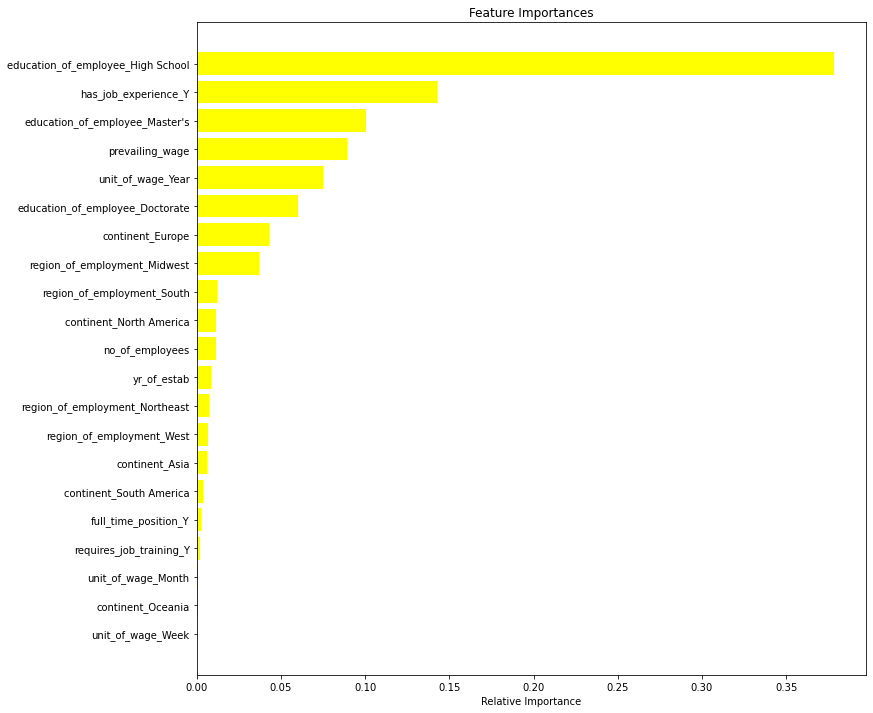%0A)

Actionable Insights and Recommendations<a href="#Actionable-Insights-and-Recommendations" class="anchor-link">¶</a>
-------------------------------------------------------------------------------------------------------------------

**Going by the Tuned Random Forest Model, features to look out for
include:**

-   High school education. This is quite suprising as EDA revealed
    Master's and Bachelor's degrees to be more likely to get certified.
-   Having work experience
-   Master's degree
-   Prevailing wage
-   Yearly wage
-   Doctorate
-   Be from Europe etc.

The model shows that these features are most likely to have an
employee's visa certified.

**Recommendations:** OFLC should look out for the following features in
candidates:

1.  Candidates that have high school education, first and foremost.
    Masters and Doctorate degrees are also important.

2.  Candidates in companies offering yearly wages. More certifications
    go out to employees on yearly wages.

3.  Candidates with work experience are more like to get their visas
    certified.

4.  European and Asian candidates have higher visa certification rates.

5.  Prevailing wage is an important feature and so variables like year
    of establishment are important because newer companies appear to
    have higher wages. Prevailing wages appear to be higher for Master's
    holders as well. So OFLC should prioritise candidates that will
    attract higher prevailing wages. Either by virtue of company,
    location, education, etc.

6.  We observed newer companies hiring more and having higher wages.
    Year of establishment is a notable feature and so OFLC can pay
    special attention to candidates employed by newer companies.

7.  Prioritise candidates employed in the Midwest region, the South and
    eventually the Northeast

In \[ \]: